<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Sayeh Jarollahi
### Student Number : 98101339
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [5]:
df = pd.read_csv('heart_disease.csv')
df.tail()
y = df["target"].copy()
X = df.drop("target", axis=1)
y = y.replace([0], [-1])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(x_train), len(y_train), len(x_test), len(y_test))

820 820 205 205


### Adaboost Algorithm Implementation (40 points)

In [6]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    tmp = sum(w)
    return (sum(w * (np.not_equal(y, y_pred)).astype(int)))/tmp
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1 - error) / error) 
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []
        self.M = None

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            if m == 0:
                weights = np.ones(len(y)) * 1 / len(y) 
            else:
                weights = update_weights(weights, self.alphas[-1], y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            weak_classifier = DecisionTreeClassifier(max_depth = 1)
            self.G_M.append(weak_classifier)
            weak_classifier.fit(X, y, sample_weight = weights)

            y_pred = weak_classifier.predict(X)
            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            error = calculate_error(y, y_pred, weights)
            self.training_errors.append(error)
            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha_m = calculate_alpha(error)
            self.alphas.append(alpha_m)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [7]:
def print_metrics(y_test, y_pred):
    print(f"Precision value: {precision_score(y_test, y_pred)}")
    print(f"Recall value: {recall_score(y_test, y_pred)}")
    print(f"F1-score value: {f1_score(y_test, y_pred)}")
    print(f"Accuracy value: {accuracy_score(y_test, y_pred)}")

In [8]:
#TODO : Fit model
adaboost = AdaBoost()

adaboost.fit(x_train, y_train, M = 100)
y_pred = adaboost.predict(x_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print_metrics(y_test, y_pred)

Precision value: 0.8165137614678899
Recall value: 0.8640776699029126
F1-score value: 0.839622641509434
Accuracy value: 0.8341463414634146


In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME")
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
print_metrics(y_test, y_pred)

Precision value: 0.8165137614678899
Recall value: 0.8640776699029126
F1-score value: 0.839622641509434
Accuracy value: 0.8341463414634146


### Early Stopping (15 points)

In [13]:
from sklearn.metrics import mean_squared_error

#TODO : Calculate validation error for different number of estimators 
val_error_result={}
wte_res = {}
for count_of_estimators in range(5, 450):
  if count_of_estimators % 100 == 0:
    print(count_of_estimators)
  adaboost = AdaBoost()
  adaboost.fit(x_train, y_train, M=count_of_estimators)
  y_pred = adaboost.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  val_error_result[count_of_estimators]=val_error
  wte_res[count_of_estimators] = adaboost.training_errors[-1]

100
200
300
400


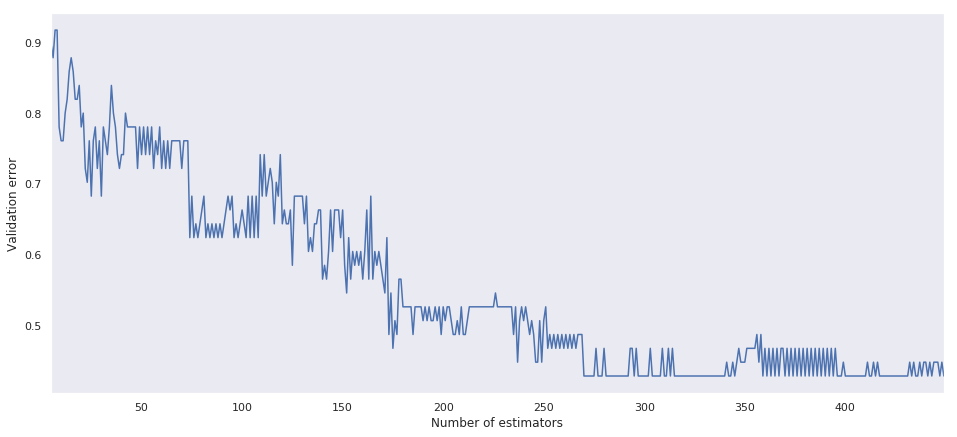

In [14]:
#TODO : Plot validation error versus number of estimators figure.
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(val_error_result.keys()), y=list(val_error_result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([min(list(val_error_result.keys())), max(list(val_error_result.keys()))])
plt.show()

In [15]:
#TODO : Print the best number for estimators and minimum value for validation error.
print("The best number for estimators is: "+ str(list(val_error_result.values()).index(min(list(val_error_result.values())))+1))
print("The minimum value for validation error is: "+ str(min(list(val_error_result.values()))))

The best number for estimators is: 266
The minimum value for validation error is: 0.4292682926829268


### Weighted Error (10 points)

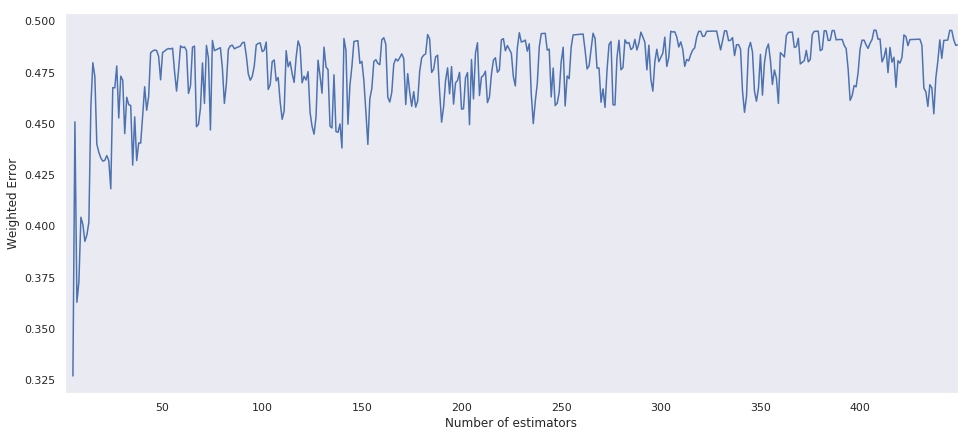

In [16]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(wte_res.keys()), y=list(wte_res.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Weighted Error")
ax.set_xlim([1, max(list(wte_res.keys()))])
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

<div dir="rtl">
هنگامی که تعداد estimator ها افزایش یابد،
وزن برخی از داده های ترین بیشتر شده و وزن برخی بسیار کاهش می یابد. در نتیجه مدل در هر ایتریشن توجه بیشتری به تعداد محدودی از داده ها دارد  و در نتیجه بر روی آن ها بایاس می شودو دقت خود را روی سایر داده ها از دست می دهد و به طور کلی روی تعداد محدودی داده اورفیت میشود. 

</div>